In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('data.csv')

In [9]:
print(df.head())
print(df.info())
print(df.describe())

   ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0   1   143.635030           1.0            3.0         3.0      1967.0   
1   2   287.678577           1.0            2.0         1.0      1949.0   
2   3   232.998485           1.0            3.0         2.0      1923.0   
3   4   199.664621           5.0            2.0         2.0      1918.0   
4   5    89.004660           4.0            3.0         3.0      1999.0   

   Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  \
0         1.0       1.0         48.0        8.297631            5.935734   
1         0.0       1.0         37.0        6.061466           10.827392   
2         1.0       0.0         14.0        2.911442            6.904599   
3         0.0       0.0         17.0        2.070949            8.284019   
4         1.0       0.0         34.0        1.523278           14.648277   

   Price  
0   6021  
1   5914  
2   4645  
3   5831  
4   6199  
<class 'pandas.core.frame.

In [11]:
# Checking the missing values
print(df.isnull().sum())

ID                    0
Square_Feet           5
Num_Bedrooms          6
Num_Bathrooms         1
Num_Floors            3
Year_Built            2
Has_Garden            6
Has_Pool              1
Garage_Size           4
Location_Score        1
Distance_to_Center    1
Price                 0
dtype: int64


In [13]:
df = df.dropna() #Dropping the missing values for simplicity.

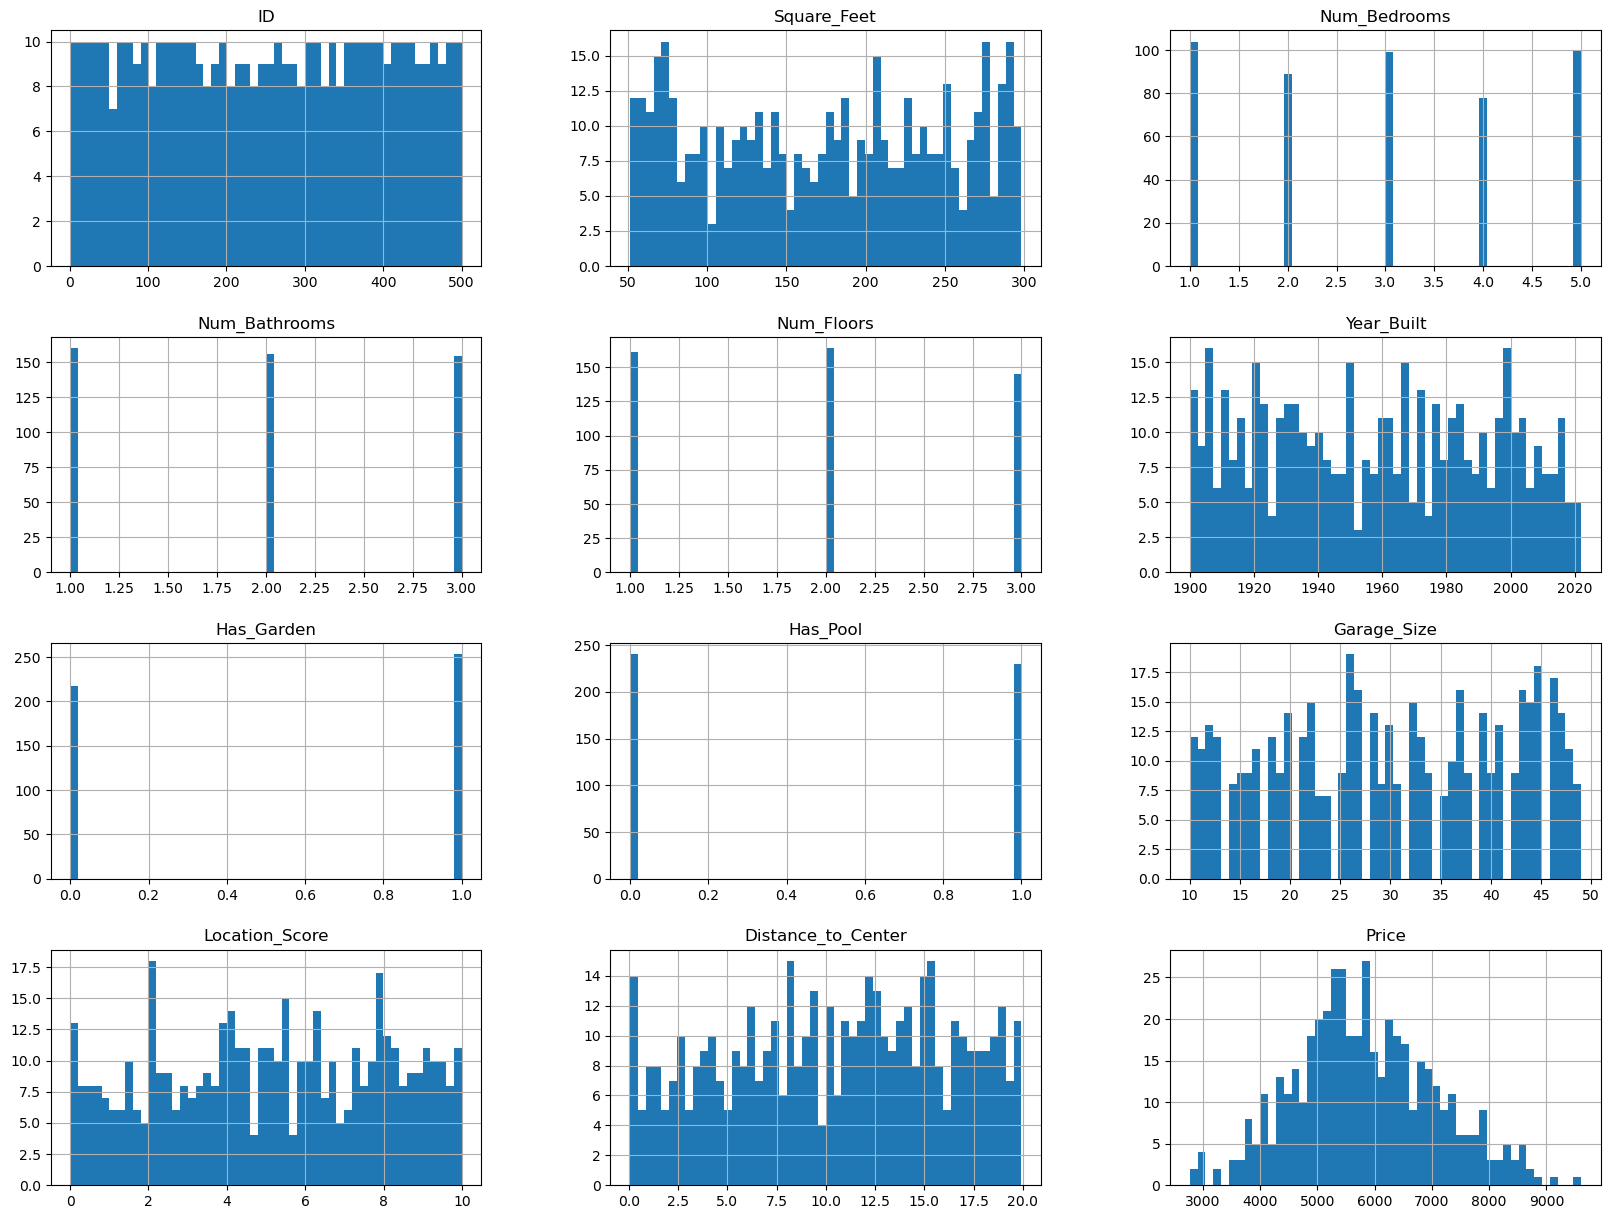

In [15]:
# Drawing Histograms
df.hist(bins=50, figsize=(20,15))
plt.show()

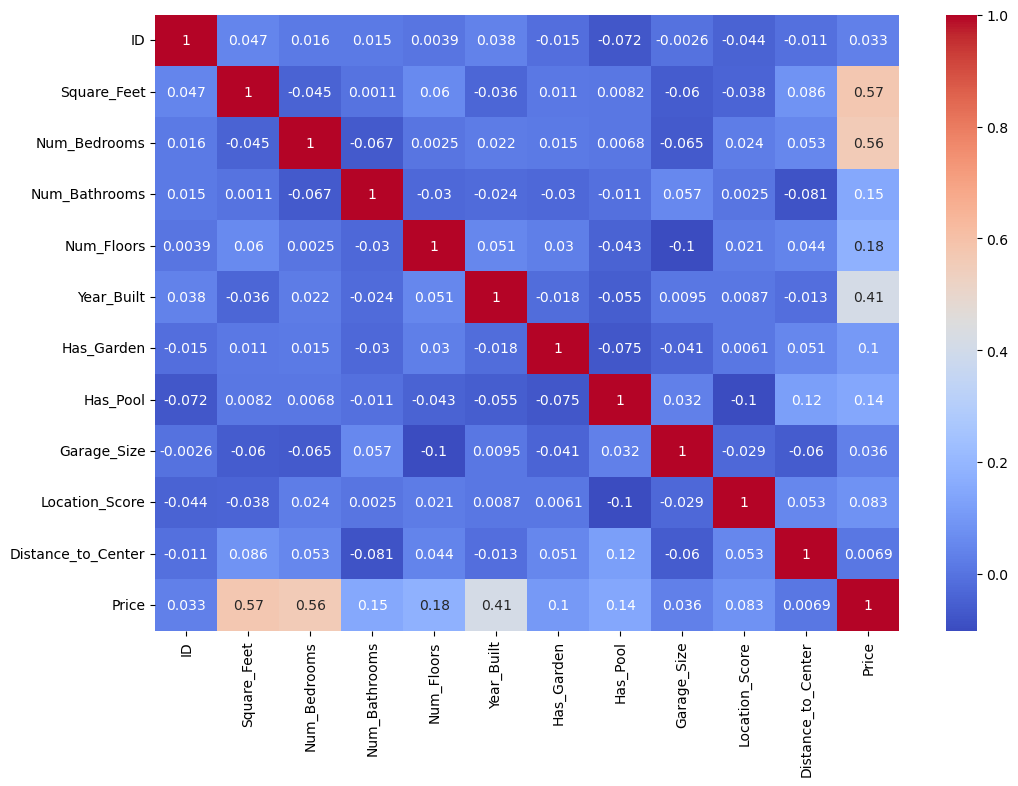

In [17]:
#Matrix is corrected over here;
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

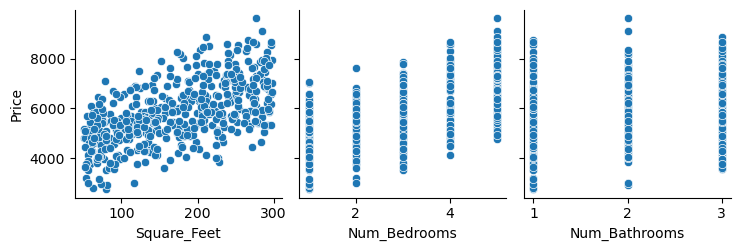

In [19]:
#Feature and price relationship:
sns.pairplot(df, x_vars=['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms'], y_vars=['Price'])
plt.show()

In [21]:
# Selecting features and target
X = df.drop('Price', axis=1)  # Lists all columns except price
y = df['Price']

# Add a column of ones 
X['intercept'] = 1

# Convert to numpy arrays
X = X.values
y = y.values.reshape(-1, 1)  # Reshape y to be a column vector


In [23]:
# Normal equation:- β=(X^T.X)^-1.X^T.y
# Calculate beta coefficients
beta = np.linalg.inv(X.T @ X) @ X.T @ y

In [25]:
#Making predictions
y_pred = X @ beta

In [29]:
#Calculating Mean Squared Error:
mse = np.mean((y - y_pred)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 35864.94618144187


In [31]:
#Calculating Residual Sum of Squares
rss = np.sum((y - y_pred)**2)
print("Residual Sum of Squares:", rss)

Residual Sum of Squares: 16856524.705277678
